#ນ. ໄພພອນ ພົນບູລົມ 3CS1
# ທຳນາຍອັດຕາການແລກປ່ຽນ ໂດລ່າ-ກີບ ຫຼັງວັນທີ 31 ພຶດສະພາ

In [ ]:
#1 Loading data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
Path = '/content/drive/MyDrive/ML_HW/USDLAK_Jan18_Jun23.csv'
df = pd.read_csv(Path, header=0)

# Data Preprocessing

In [ ]:
df.head()

,Date,Close
0,"1/1/2018, 23:58:00",8091.9
1,"2/1/2018, 23:58:00",8112.3
2,"3/1/2018, 23:58:00",8109.4
3,"4/1/2018, 23:58:00",8105.4
4,"5/1/2018, 23:58:00",8295.0


In [ ]:
#Split DateTime column by comma and space
df[['NewDate', 'Time']] = df['Date'].str.split(', ').apply(pd.Series)

In [ ]:
df.head()

,Date,Close,NewDate,Time
0,"1/1/2018, 23:58:00",8091.9,1/1/2018,23:58:00
1,"2/1/2018, 23:58:00",8112.3,2/1/2018,23:58:00
2,"3/1/2018, 23:58:00",8109.4,3/1/2018,23:58:00
3,"4/1/2018, 23:58:00",8105.4,4/1/2018,23:58:00
4,"5/1/2018, 23:58:00",8295.0,5/1/2018,23:58:00


In [ ]:
df = df.drop(['Date', 'Time'], axis=1)

In [ ]:
df.head()

,Close,NewDate
0,8091.9,1/1/2018
1,8112.3,2/1/2018
2,8109.4,3/1/2018
3,8105.4,4/1/2018
4,8295.0,5/1/2018


In [ ]:
#rename
df = df.rename(columns={'NewDate': 'Date'})
df = df[['Date'] + [col for col in df.columns if col !='Date']]

In [ ]:
df.head()

,Date,Close
0,1/1/2018,8091.9
1,2/1/2018,8112.3
2,3/1/2018,8109.4
3,4/1/2018,8105.4
4,5/1/2018,8295.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1884 non-null   object 
 1   Close   1884 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.6+ KB


In [ ]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [ ]:
#Convert to datetime format
df["Date"] = pd.to_datetime(df["Date"], format = '%d/%m/%Y')
#Extract the year and month from the 'Date' Column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Data Visualization

In [ ]:
df.head()

,Date,Close,Year,Month
0,2018-01-01,8091.9,2018,1
1,2018-01-02,8112.3,2018,1
2,2018-01-03,8109.4,2018,1
3,2018-01-04,8105.4,2018,1
4,2018-01-05,8295.0,2018,1


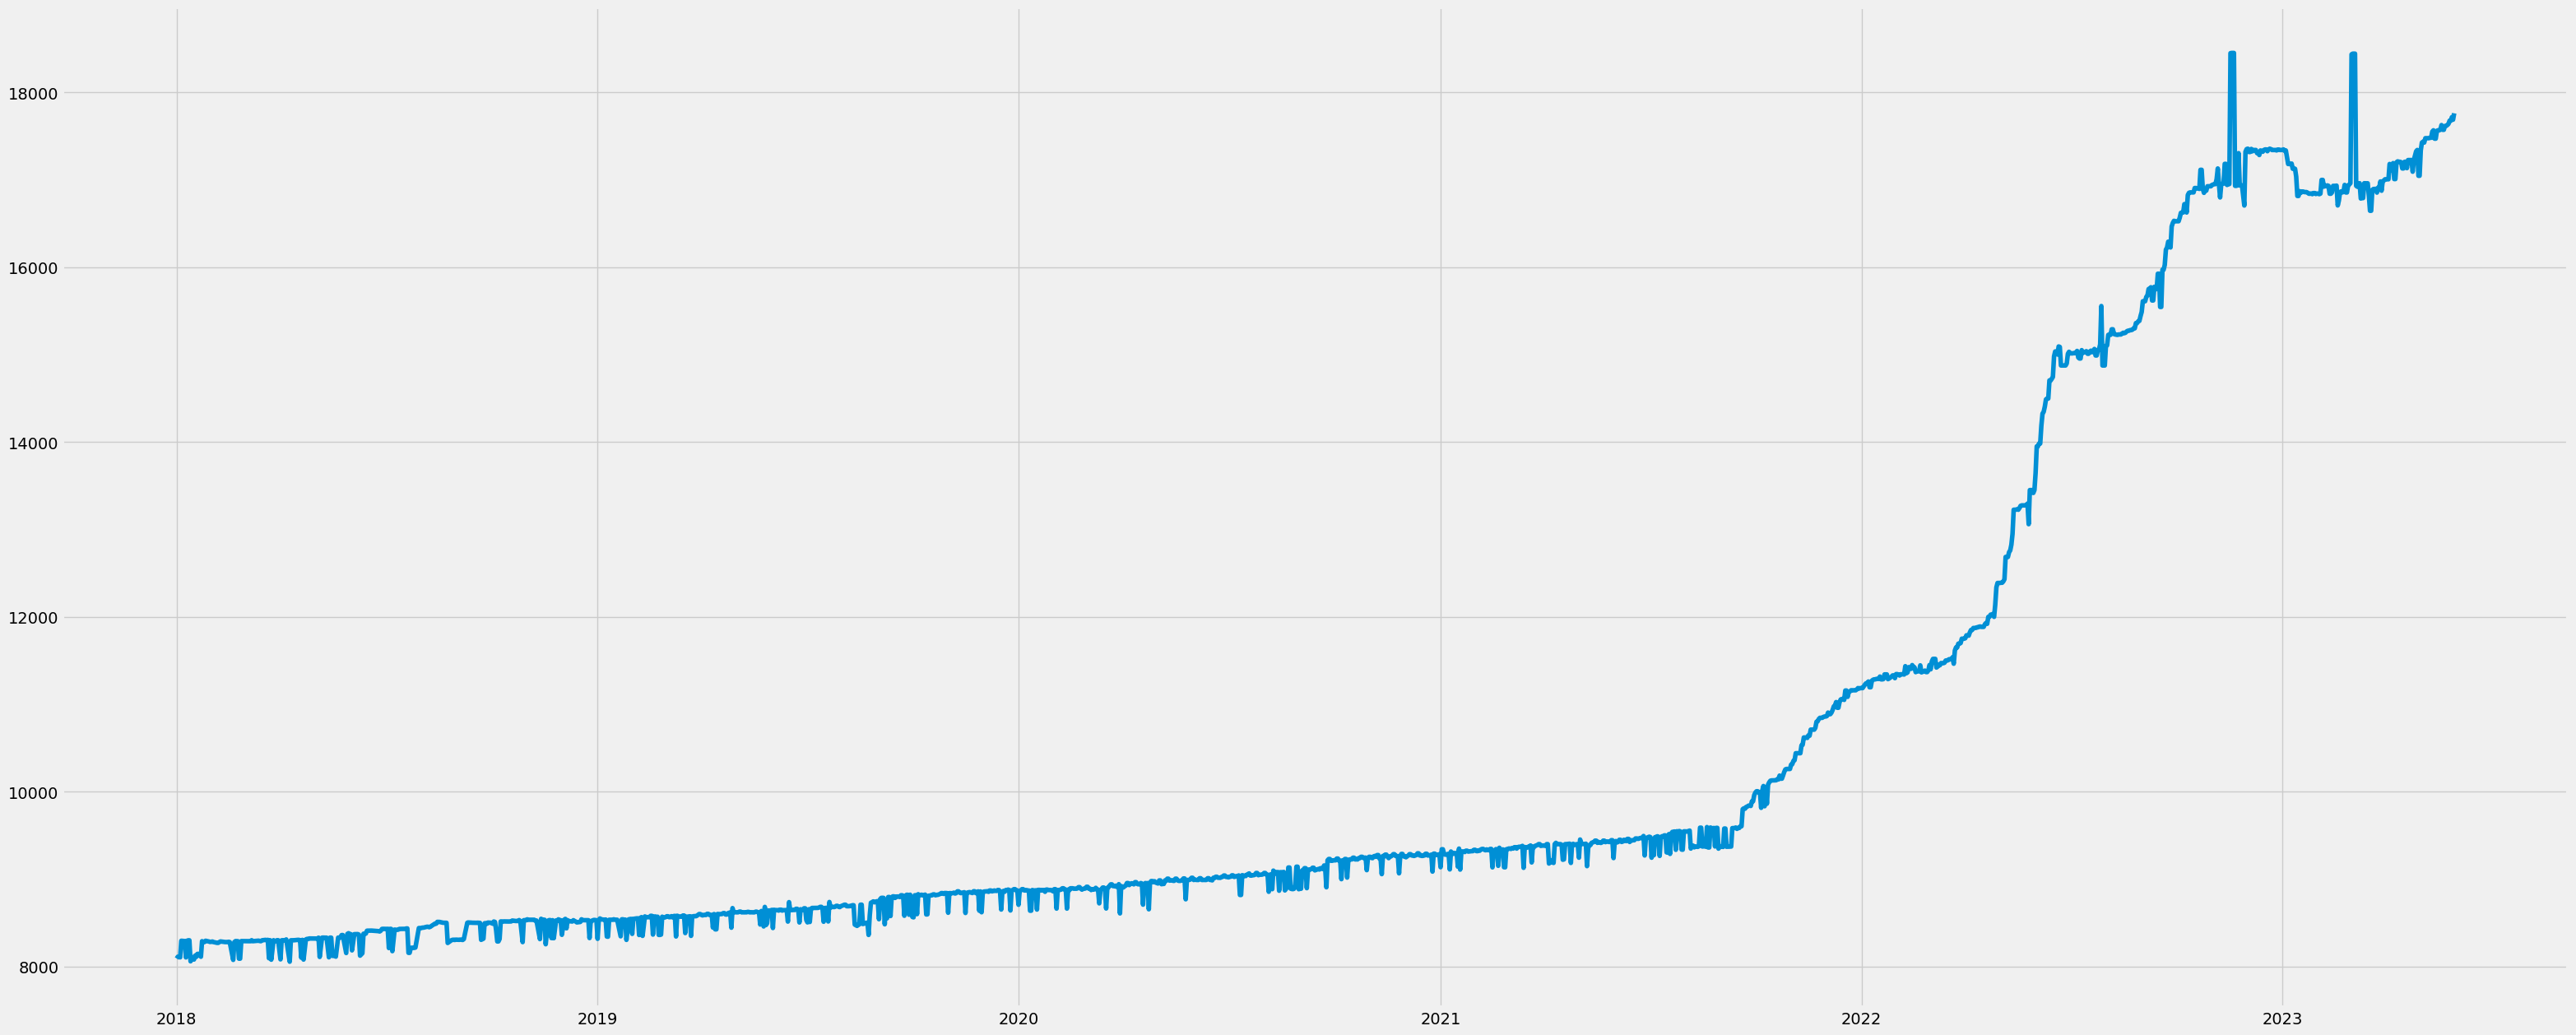

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(35, 15))
plt.plot(df["Date"], df["Close"])

In [ ]:
figure = px.line(df, x="Date",
                 y="Close",
                 title='USD - LAK Conversion Rate over the years')
figure.show()

#Yearly Growth

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

# Calculate yearly growth
growth = df.groupby('Year').agg({'Close': lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0]*100})

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth['Close'],
                     name='Yearly Growth'))

fig.update_layout(title="Yearly Growth of USD - INR Conversion Rate",
                  xaxis_title="Year",
                  yaxis_title="Growth (%)",
                  width=900,
                  height=600)

pio.show(fig)

# Monthly Growth

In [ ]:
# Calculate monthly growth
df['Growth'] = df.groupby(['Year', 'Month'])['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Group data by Month and calculate average growth
grouped_data = df.groupby('Month').mean().reset_index()


<ipython-input-18-8d59fdf054bc>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data['Month'],
    y=grouped_data['Growth'],
    marker_color=grouped_data['Growth'],
    hovertemplate='Month: %{x}<br>Average Growth: %{y:.2f}%<extra></extra>'
))

fig.update_layout(
    title="Aggregated Monthly Growth of USD - LAK Conversion Rate",
    xaxis_title="Month",
    yaxis_title="Average Growth (%)",
    width=900,
    height=600
)

pio.show(fig)

# Time Series Forecasting

In [ ]:
df.head()

,Date,Close,Year,Month,Growth
0,2018-01-01,8091.9,2018,1,2.361621
1,2018-01-02,8112.3,2018,1,2.361621
2,2018-01-03,8109.4,2018,1,2.361621
3,2018-01-04,8105.4,2018,1,2.361621
4,2018-01-05,8295.0,2018,1,2.361621


<Figure size 640x480 with 0 Axes>

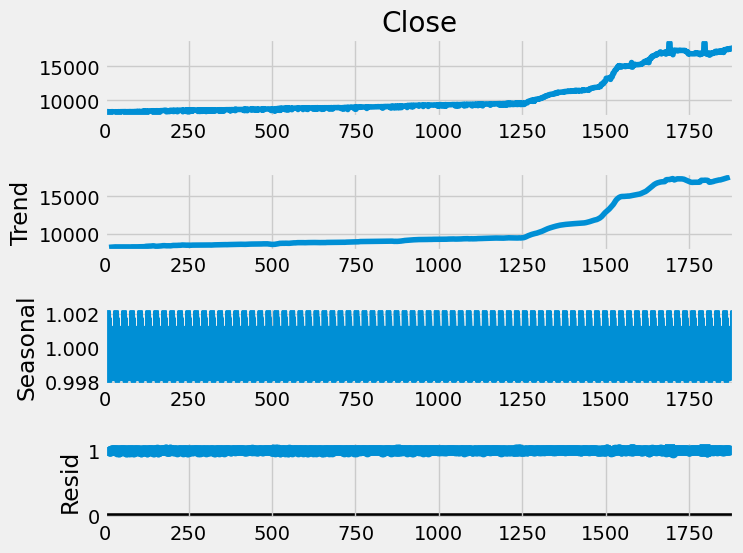

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], model='multiplicative', period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 6)
fig.show()

#Initialize SARIMAX Model

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.0 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(df['Close'], seasonal=True, m=65, suppress_warnings=True)
print(model.order)

<Figure size 640x480 with 0 Axes>

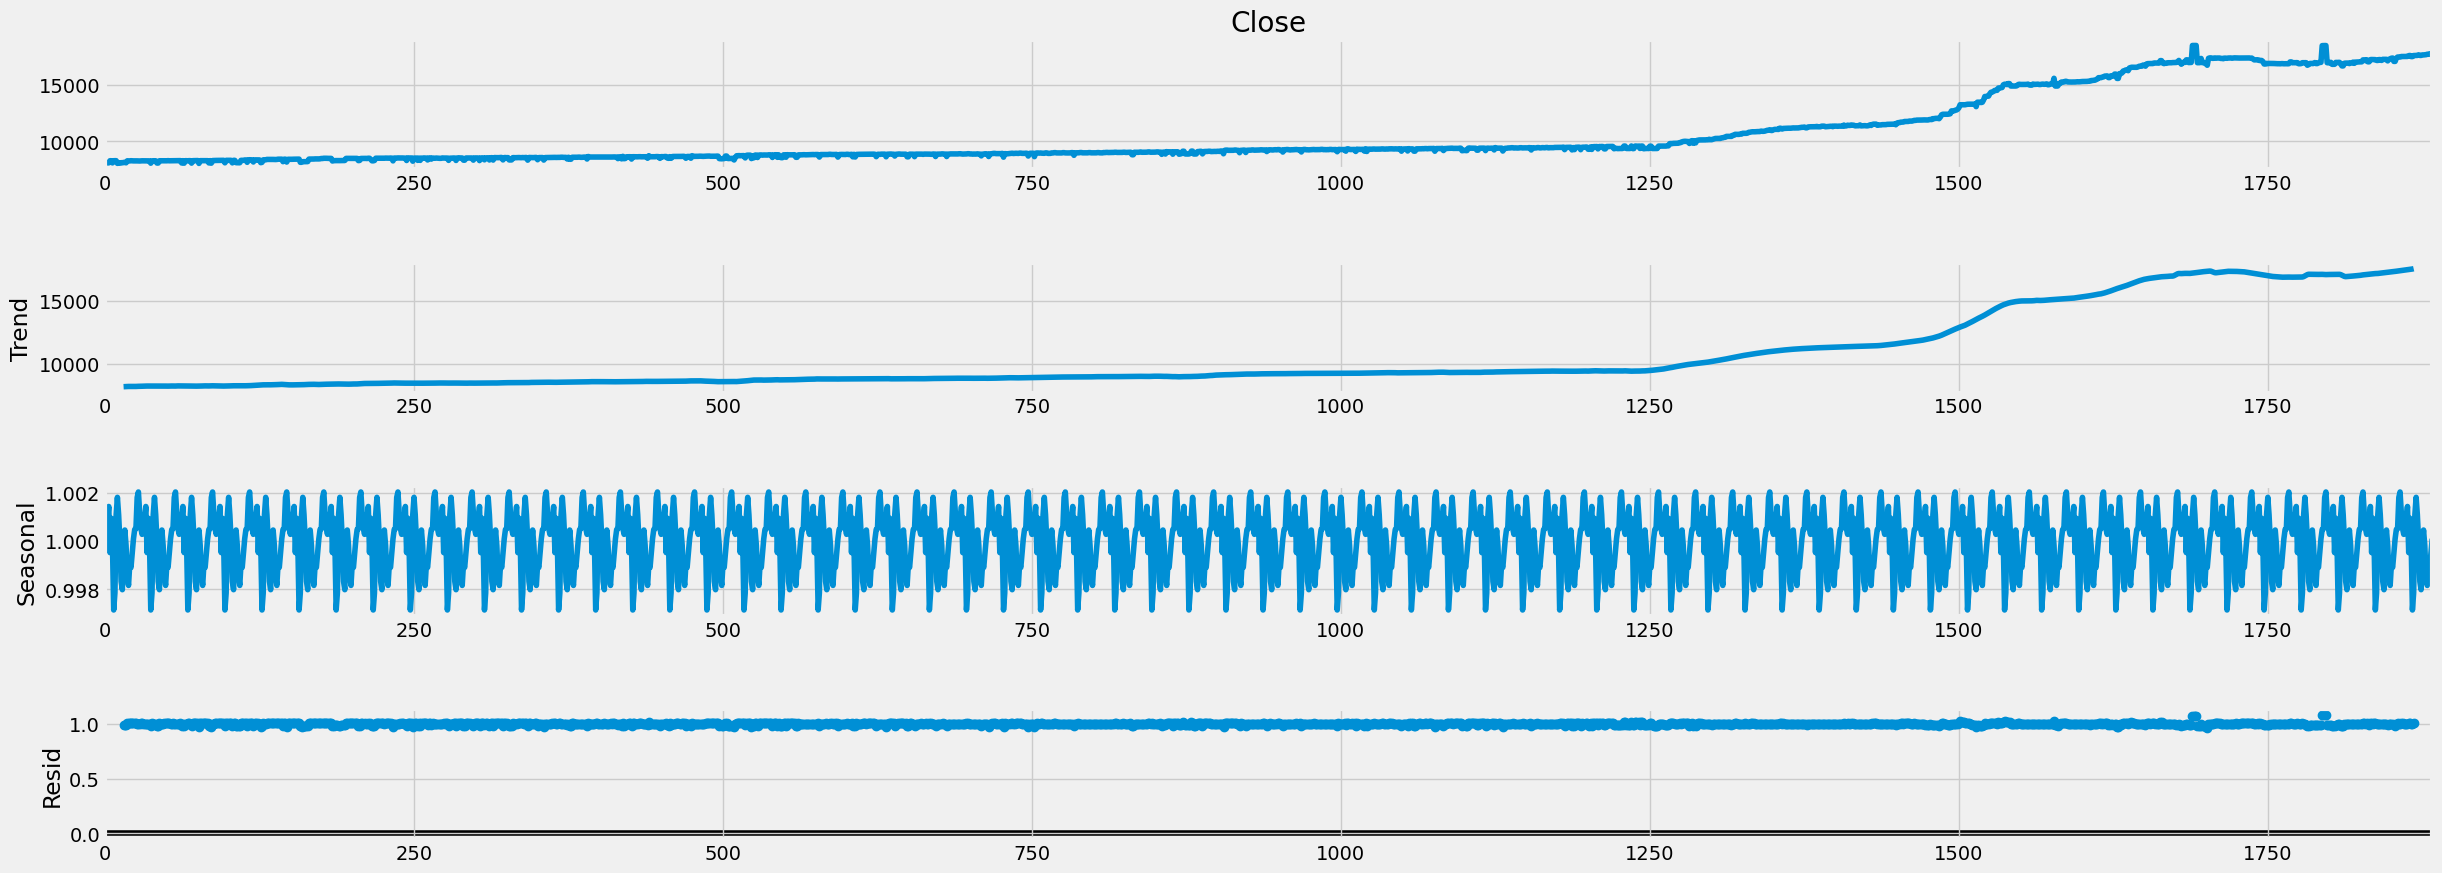

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Close"], model='multiplicative', period = 30)

fig = plt.figure()

fig = result.plot()

fig.set_size_inches(30, 10)


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

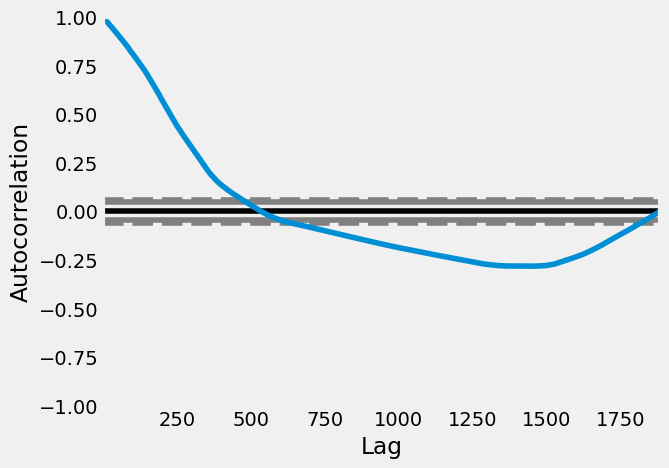

In [ ]:
#find p
pd.plotting.autocorrelation_plot(df["Close"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



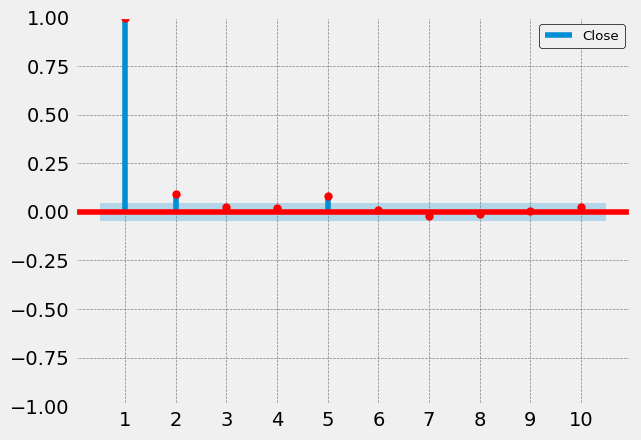

In [ ]:
# find q
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(nrows=1, ncols=1, facecolor="#F0F0F0")
# autocorrelation subplots
plot_pacf(df["Close"], lags=10, alpha=0.05, zero=False, title=None, ax=ax, color="red")
ax.legend(["Close"], loc="upper right", fontsize="x-small", framealpha=1, edgecolor="black", shadow=None)
ax.grid(which="major", color="grey", linestyle="--", linewidth=0.5)
ax.set_xticks(np.arange(1, 11, step=1))

#plot_pacf(df["Close"], lags = 100)

In the above partial autocorrelation plot, we can see that only one point is far away from all the points. That is how to decide the q value. Hence the value of q is 1.

# The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

In [ ]:
p, d, q = 5, 1, 1

In [ ]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12), approximate_diffuse=True)

In [ ]:
fitted=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
print(fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1884
Model:             SARIMAX(5, 1, 1)x(5, 1, 1, 12)   Log Likelihood              -11462.652
Date:                            Sat, 17 Jun 2023   AIC                          22951.304
Time:                                    15:42:22   BIC                          23023.249
Sample:                                         0   HQIC                         22977.810
                                           - 1884                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7329      0.011     64.151      0.000       0.711       0.755
ar.L2          0.1165      0.019   

#ທຳນາຍເຣທເງິນອີກ 30ມື້

In [ ]:
predictions = fitted.predict(len(df), len(df)+30)
print(predictions)

1884    17743.869366
1885    17731.696025
1886    17741.714289
1887    17744.044894
1888    17758.876951
            ...     
1940    18092.216700
1941    18117.900354
1942    18115.058537
1943    18122.375606
1944    18118.929516
Name: predicted_mean, Length: 61, dtype: float64


In [ ]:
# Create figure
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title="LAK Rate - Training Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend_title="Data",
    width=900,
    height=800
)

pio.show(fig)

# -----------End-----------
